In [7]:
%matplotlib inline
# This source code is licensed under the license found in the
# LICENSE file in the root directory of this source tree.
# --------------------------------------------------------
# References:
# Sagittarius to https://github.com/addiewc/Sagittarius
# --------------------------------------------------------
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from importlib import reload
import plot_settings
import plot_utils
plt.style.use('seaborn-white')
fig_dir = 'figures/'
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)


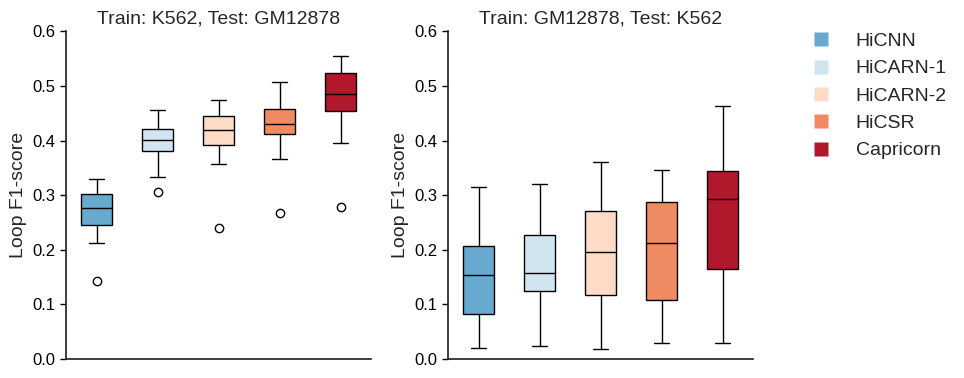

In [14]:
%matplotlib inline
#Metric: Loop F1-score
late_time_color = ["#67a9cf","#d1e5f0",  "#fddbc7", "#ef8a62", "#b2182b"]
NUM=len(late_time_color)
ax = plot_settings.get_wider_axis(double=True)
ax = plt.subplot(1, 2, 1)
ax.tick_params("y",which="major",length=4,width = 1.0,colors = "black")
#'Train: K562, Test: GM12878'
#### FILL YOUR RESULTS BELOW ####
result_list = [[0.3174143753014954, 0.2762623331398723, 0.26836581709145424, 0.24550264550264553, 0.26232394366197187, 0.3124539425202653, 0.25939849624060146, 0.2757281553398058, 0.28846153846153844, 0.24571428571428572, 0.3296516567544605, 0.314453125, 0.21276595744680854, 0.307277628032345, 0.29081632653061223, 0.23406720741599074, 0.2962962962962963, 0.26200873362445415, 0.23850085178875638, 0.32148900169204736, 0.24472573839662448, 0.29193899782135074, 0.14325842696629212],
[0.4004117344312918, 0.3803191489361702, 0.42260061919504643, 0.3452502553626149, 0.3945945945945946, 0.36363636363636365, 0.41841004184100417, 0.39959636730575177, 0.39950372208436724, 0.3798283261802575, 0.42356959863364646, 0.41359773371104813, 0.3333333333333333, 0.41379310344827586, 0.402315484804631, 0.3782991202346041, 0.4392638036809816, 0.3927765237020316, 0.4116504854368932, 0.45652173913043476, 0.42323651452282157, 0.4463276836158192, 0.30592734225621415],
[0.43381180223285487, 0.4076346284935242, 0.4533120510774142, 0.3614457831325301, 0.4011142061281337, 0.389630793401414, 0.39462809917355374, 0.4190283400809717, 0.4215809284818068, 0.39035087719298245, 0.46167557932263814, 0.44550669216061184, 0.35785288270377735, 0.44573082489146165, 0.40702781844802344, 0.38152011922503726, 0.4572127139364303, 0.4412470023980815, 0.412, 0.4667931688804554, 0.44537815126050423, 0.4745762711864407, 0.24],
[0.47881122729774356, 0.4289897510980966, 0.4311774461028192, 0.39637599093997733, 0.41699604743083, 0.43107769423558895, 0.4377104377104377, 0.4048140043763676, 0.4327956989247312, 0.380499405469679, 0.5054545454545455, 0.4497907949790795, 0.36619718309859156, 0.4503105590062112, 0.42996742671009774, 0.49050632911392406, 0.4643734643734644, 0.41012658227848103, 0.4208566108007449, 0.5066666666666667, 0.41545893719806765, 0.4712328767123288, 0.26716141001855287],
[0.5477230193387399, 0.47927031509121054, 0.4901256732495512, 0.3952662721893492, 0.4575892857142857, 0.46886446886446886, 0.49449204406364755, 0.45012165450121655, 0.4962852897473997, 0.47027027027027035, 0.5312820512820513, 0.5146726862302483, 0.4228855721393035, 0.48958333333333326, 0.4856115107913669, 0.5346534653465346, 0.47965116279069764, 0.42016806722689076, 0.4444444444444444, 0.5548387096774193, 0.5376344086021506, 0.5337837837837838, 0.27811860940695293]
]
#### FILL YOUR RESULTS ABOVE ####
complete_name_list = ['HiCNN', 'HiCARN-1', 'HiCARN-2', 'HiCSR', 'Capricorn']

plot_utils.box_plot(ax, result_list, widths=0.5, 
    ylabel='Loop F1-score', box_colors=late_time_color, xticks=np.arange(1, NUM+1, 1), xticklabels=['' for i in range(NUM)], xlabel='')
complete_col_list = late_time_color
lp = lambda i: plt.plot([],color=complete_col_list[i], ms=10, mec="none",
                        label=complete_name_list[i], ls="",  marker="s")[0]
handles = [lp(i) for i in range(NUM)]
ax.set_ylim(0.0, 0.6)
plot_utils.format_ax(ax)
plt.tight_layout()
plt.title('Train: K562, Test: GM12878')

ax = plt.subplot(1, 2, 2)
ax.tick_params("y",which="major",length=4,width = 1.0,colors = "black")
#'Train: GM12878, Test: K562'
#### FILL YOUR RESULTS BELOW ####
result_list = [[0.3157894736842105, 0.0975609756097561, 0.1167247386759582, 0.0433031218529708, 0.08902077151335312, 0.16040955631399317, 0.2091917591125198, 0.08118081180811808, 0.13960546282245828, 0.1971830985915493, 0.14539007092198583, 0.020512820512820513, 0.07398273736128237, 0.1989528795811518, 0.1943127962085308, 0.21923076923076923, 0.058365758754863814, 0.29069767441860467, 0.26720647773279355, 0.17475728155339806, 0.2532751091703057, 0.029024637192035095],
[0.2768777614138439, 0.12314225053078556, 0.12928970470869913, 0.04597701149425287, 0.1257995735607676, 0.2265625, 0.16150740242261102, 0.13227513227513227, 0.12550066755674233, 0.22432432432432434, 0.1536144578313253, 0.02372644801116539, 0.08359456635318704, 0.2273781902552204, 0.2301255230125523, 0.22405271828665568, 0.07243460764587525, 0.32098765432098764, 0.30405405405405406, 0.2571428571428571, 0.22364217252396165, 0.12416851441241686],
[0.33418584825234443, 0.14731369150779897, 0.127134724857685, 0.04303967720242098, 0.11270983213429256, 0.24169184290030213, 0.20512820512820512, 0.13196480938416422, 0.15226939970717424, 0.23941605839416058, 0.18840579710144928, 0.018518518518518517, 0.05232558139534884, 0.2659279778393352, 0.28641975308641976, 0.27223230490018147, 0.09004739336492891, 0.36074270557029176, 0.3333333333333333, 0.30158730158730157, 0.2440677966101695, 0.030217186024551465],
[0.3460837887067395, 0.162839248434238, 0.1581196581196581, 0.058922558922558925, 0.11048158640226628, 0.23448275862068965, 0.28776978417266186, 0.10819672131147541, 0.17235188509874327, 0.2581699346405229, 0.1902834008097166, 0.03209876543209877, 0.06934306569343066, 0.26625386996904027, 0.26436781609195403, 0.29321663019693656, 0.07536231884057971, 0.31137724550898205, 0.3409090909090909, 0.2830188679245283, 0.3215686274509804, 0.030005770340450086],
[0.46324786324786327, 0.20431328036322363, 0.18479532163742687, 0.07887817703768625, 0.1809369951534733, 0.32432432432432434, 0.3333333333333333, 0.15925925925925924, 0.2546816479400749, 0.28794992175273865, 0.296875, 0.029816513761467888, 0.10661764705882354, 0.3221884498480243, 0.31088082901554404, 0.34730538922155685, 0.11428571428571428, 0.42631578947368415, 0.38235294117647056, 0.38888888888888895, 0.4234234234234235, 0.03268945022288262]
]
#### FILL YOUR RESULTS ABOVE ####
complete_name_list = ['HiCNN', 'HiCARN-1', 'HiCARN-2', 'HiCSR', 'Capricorn']
plot_utils.box_plot(ax, result_list, widths=0.5, 
    ylabel='Loop F1-score', box_colors=late_time_color, xticks=np.arange(1, NUM+1, 1), xticklabels=['' for i in range(NUM)], xlabel='')
complete_col_list = late_time_color
lp = lambda i: plt.plot([],color=complete_col_list[i], ms=10, mec="none",
                        label=complete_name_list[i], ls="",  marker="s")[0]
handles = [lp(i) for i in range(NUM)]
plot_utils.format_legend(ax, handles, complete_name_list)
ax.set_ylim(0.0, 0.6)
plot_utils.put_legend_outside_plot(ax)
plot_utils.format_ax(ax)
plt.tight_layout()
plt.title('Train: GM12878, Test: K562')
plt.savefig(fig_dir + 'TestHiCCUPS.pdf')


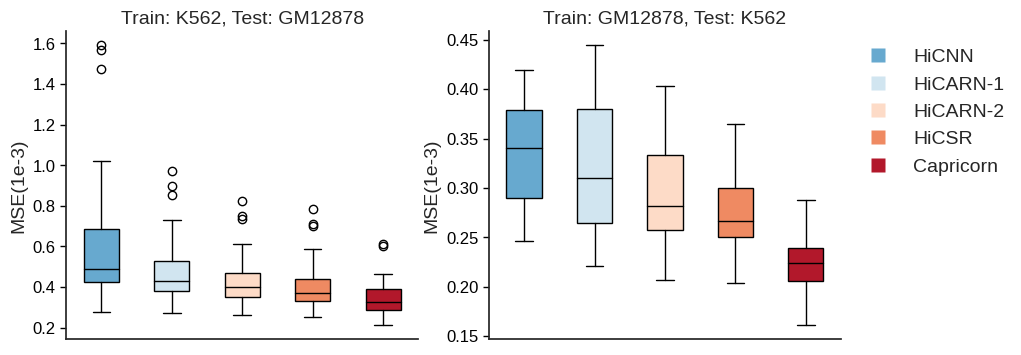

In [18]:
%matplotlib inline
# Metric: MSE
late_time_color = ["#67a9cf","#d1e5f0",  "#fddbc7", "#ef8a62", "#b2182b"]
NUM=len(late_time_color)
ax = plot_settings.get_wider_axis(double=True)
ax = plt.subplot(1, 2, 1)
ax.tick_params("y",which="major",length=4,width = 1.0,colors = "black")
#'Train: K562, Test: GM12878'
#### FILL YOUR RESULTS BELOW ####
result_list = [    [0.000641365144204208, 0.0004514041679628695, 0.00042885249541287475, 0.00027549851932643493, 0.00037365257643836805, 0.00047039655013282925, 0.00042521316180942135, 0.0003808839091757028, 0.0004601736584763189, 0.00057059033252658, 0.0007309477554467743, 0.0006037056019965989, 0.000303197132873917, 0.0005232828157025648, 0.0006335135269388476, 0.0008708098268204453, 0.0015920555298267465, 0.00044458749515235795, 0.0015684603348377017, 0.0010217355216954748, 0.000488557938340097, 0.0014740092716061957, 0.00028277419606765773],
               [0.0004938555914107181, 0.00038261200486376976, 0.00037874598955591816, 0.0002723091147140988, 0.0003413740198432604, 0.00041088801931500217, 0.0003798613772542434, 0.000350167155418367, 0.0003775535612086319, 0.0004748452966559207, 0.0005612080868826613, 0.0004963969544377019, 0.000293721827996112, 0.0004335265675264899, 0.00046927703219143196, 0.0006340187262316682, 0.000971541891789448, 0.0004018997424149739, 0.0008968540264224121, 0.000729397958101308, 0.0004291888794105821, 0.0008553374888147045, 0.000275248997242109],
               [0.0004377540178096482, 0.00035968326831613756, 0.00035634406312274886, 0.00026418264663045845, 0.00032428145916521566, 0.0003843378020022996, 0.00036256467986935597, 0.00033192582668551524, 0.00034631530537475996, 0.0004351904854216681, 0.00048760190535913916, 0.0004516026637642029, 0.0002895931814752585, 0.00039836887225628295, 0.00040544282414741085, 0.0005521499633330012, 0.0008249919533165083, 0.00038670541880036515, 0.0007516783340919735, 0.0006118167790348961, 0.00041946698614141404, 0.0007371557127996508, 0.0002669307785404944],
               [0.00041011449242840735, 0.000333804662984891, 0.0003325360269117375, 0.0002531148934110303, 0.0003047525597832147, 0.00036249612273459627, 0.00034101419285056185, 0.0003116190117099106, 0.0003273106985725305, 0.0004081680700818455, 0.0004579893904531772, 0.00042474814531295234, 0.0002754499487196942, 0.00037262286262603123, 0.00038160620483610505, 0.0005257380772913989, 0.0007854392235420567, 0.00036817655385202095, 0.0007006305936541809, 0.0005854298514746353, 0.00039742785653388657, 0.0007127238810490232, 0.00025480050863133346],
               [0.00037016470229776544, 0.00032604848950227303, 0.0003068374590594033, 0.0002322145325312287, 0.000290011155115552, 0.00032378309507358677, 0.000316273144981405, 0.0002824773178791915, 0.0002716169973523008, 0.00035572163339119375, 0.00041232122595737445, 0.0003647920861831438, 0.0002125238648068581, 0.00030200990931747137, 0.0003463144888990503, 0.0004383668216947864, 0.0006011065237921853, 0.0002878856016222901, 0.0006141518893534562, 0.00044396687124620665, 0.0002454978117605872, 0.00046245811819462966, 0.00023717849932701013]
]
#### FILL YOUR RESULTS ABOVE ####
complete_name_list = ['HiCNN', 'HiCARN-1', 'HiCARN-2', 'HiCSR', 'Capricorn']
result_list = [[i*1000 for i in j] for j in result_list]

plot_utils.box_plot(ax, result_list, widths=0.5, 
    ylabel='MSE(1e-3)', box_colors=late_time_color, xticks=np.arange(1, NUM+1, 1), xticklabels=['' for i in range(NUM)], xlabel='')
complete_col_list = late_time_color
lp = lambda i: plt.plot([],color=complete_col_list[i], ms=10, mec="none",
                        label=complete_name_list[i], ls="",  marker="s")[0]
handles = [lp(i) for i in range(NUM)]
plot_utils.format_ax(ax)

plt.title('Train: K562, Test: GM12878')

ax = plt.subplot(1, 2, 2)
ax.tick_params("y",which="major",length=4,width = 1.0,colors = "black")
#'Train: GM12878, Test: K562'
#### FILL YOUR RESULTS BELOW ####
result_list = [[0.0002659401676229781, 0.00039402470719787175, 0.0004002365350111364, 0.00040287685824190597, 0.00038261612498309306, 0.00034583099553609696, 0.0003316121151548944, 0.00037653078961899993, 0.00036256362089400634, 0.00035692982013650073, 0.00037919838073791735, 0.00029990021943508997, 0.0003622306017232462, 0.00027166998781071115, 0.0002880006720715386, 0.00033567083231301673, 0.00041918129148756105, 0.0002852853937418915, 0.0003325401578287953, 0.00029390968142566575, 0.00024647542866412597, 0.00028151193794135736],
               [0.0002317173282814229, 0.0003686584568846692, 0.00038436756403585273, 0.0004447011875859099, 0.0003569975865048079, 0.0002882590974206796, 0.0002743353719366297, 0.0003576419070201328, 0.00031426223354375497, 0.00030564610617101005, 0.000327567830315939, 0.00039150274339032283, 0.0004022774585501523, 0.00022091989469914672, 0.00024554904300745016, 0.000283232629798952, 0.0004304435082026059, 0.00026136050629578376, 0.0002725969069807297, 0.0002558286798898775, 0.00024090134428652837, 0.00039395702863319934],
               [0.00022644812458343246, 0.0003200365489101002, 0.00033945823579407605, 0.0004032618468969451, 0.00031651155576487087, 0.0002681520453672012, 0.00025646656548013847, 0.00031202743144771765, 0.00028118511575423485, 0.00027869001922331305, 0.0002956683576598312, 0.00033726794456115486, 0.00034500899372303344, 0.0002066398885347089, 0.00023849825287570862, 0.0002812249698853773, 0.00037967299468091994, 0.00026129352715704095, 0.0002606710451921315, 0.0002472611088589436, 0.00023779044622345853, 0.00033928559890018844],
               [0.00022638876024536292, 0.00029106699432552137, 0.00030327576539038, 0.00036460822638373694, 0.00028595858127582473, 0.00025854174270527596, 0.000248829843998183, 0.0002837158240558803, 0.00026082596386523026, 0.00025803482517980093, 0.00027277039642493474, 0.00033108113071922597, 0.0003294992879062761, 0.00020350561426264163, 0.00023623556493813835, 0.00027548628472111005, 0.00033867327054375445, 0.00025422928685210177, 0.00025545323833458037, 0.00023920662225526777, 0.0002375929515759388, 0.000339493740157876],
               [0.00019974856660269776, 0.0002544694501059006, 0.0002598082291275171, 0.0002876071277320755, 0.0002404717188387359, 0.00021472725974272538, 0.00022155907823342782, 0.00024000770696867374, 0.0002226060475448479, 0.00022646019476191075, 0.00022884122578162007, 0.00021107891766068788, 0.00023755433939100172, 0.00017008570855813352, 0.00020489104852822713, 0.000225885415727813, 0.0002778460265126095, 0.00022722414943676528, 0.00020062276634428517, 0.00016107458126366552, 0.00020140647886858517, 0.00021003525299655133]
]
#### FILL YOUR RESULTS ABOVE ####
complete_name_list = ['HiCNN', 'HiCARN-1', 'HiCARN-2', 'HiCSR', 'Capricorn']

result_list = [[i*1000 for i in j] for j in result_list]

plot_utils.box_plot(ax, result_list, widths=0.5, 
    ylabel='MSE(1e-3)', box_colors=late_time_color, xticks=np.arange(1, NUM+1, 1), xticklabels=['' for i in range(NUM)], xlabel='')
complete_col_list = late_time_color
lp = lambda i: plt.plot([],color=complete_col_list[i], ms=10, mec="none",
                        label=complete_name_list[i], ls="",  marker="s")[0]
handles = [lp(i) for i in range(NUM)]
plot_utils.format_legend(ax, handles, complete_name_list)

plot_utils.put_legend_outside_plot(ax, anchorage=(1, 1))
plot_utils.format_ax(ax)
plt.title('Train: GM12878, Test: K562')
plt.savefig(fig_dir + 'TestMSE.pdf')

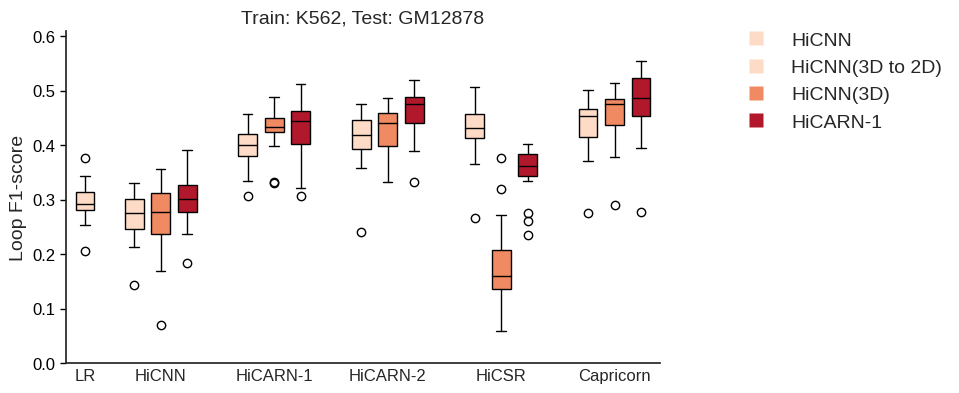

In [6]:
%matplotlib inline
#Ablation Study: 'Train: K562, Test: GM12878' 
late_time_color = ["#fddbc7"] + ["#fddbc7", "#ef8a62", "#b2182b"] * 5
NUM=len(late_time_color)

ax = plot_settings.get_wider_axis(double=True)

ax.tick_params("y",which="major",length=4,width = 1.0,colors = "black")
#### FILL YOUR RESULTS BELOW ####
result_list = [[0.3184868822452715, 0.2830188679245283, 0.2901639344262295, 0.2629757785467128, 0.2770083102493075, 0.3191489361702128, 0.2869198312236287, 0.2922922922922923, 0.2904040404040404, 0.2979242979242979, 0.3049579045837231, 0.2848101265822785, 0.25390625, 0.2971246006389776, 0.2926829268292683, 0.34275618374558303, 0.311178247734139, 0.2722772277227723, 0.3242009132420091, 0.3755656108597285, 0.27715355805243447, 0.3233082706766917, 0.2062780269058296],
    [0.3174143753014954, 0.2762623331398723, 0.26836581709145424, 0.24550264550264553, 0.26232394366197187, 0.3124539425202653, 0.25939849624060146, 0.2757281553398058, 0.28846153846153844, 0.24571428571428572, 0.3296516567544605, 0.314453125, 0.21276595744680854, 0.307277628032345, 0.29081632653061223, 0.23406720741599074, 0.2962962962962963, 0.26200873362445415, 0.23850085178875638, 0.32148900169204736, 0.24472573839662448, 0.29193899782135074, 0.14325842696629212],
[0.32612723903644225, 0.27218934911242604, 0.2881040892193309, 0.19354838709677422, 0.21768707482993196, 0.2770970782280867, 0.23346303501945526, 0.2295482295482296, 0.25867507886435337, 0.280794701986755, 0.33536585365853655, 0.28798185941043086, 0.16901408450704225, 0.2614601018675721, 0.29059829059829057, 0.3173431734317343, 0.3161676646706587, 0.24225352112676055, 0.30985915492957744, 0.32892249527410206, 0.25136612021857924, 0.3556701030927835, 0.06971677559912855],
[0.3319977103606182, 0.2944090587402689, 0.28661916072842436, 0.25571725571725573, 0.3045977011494253, 0.28781684382665573, 0.3205128205128205, 0.2364217252396166, 0.38352272727272724, 0.26419753086419756, 0.30348727615457116, 0.28838174273858924, 0.3013698630136986, 0.3452566096423017, 0.304857621440536, 0.3447098976109215, 0.26541554959785524, 0.2763466042154567, 0.2795275590551181, 0.30495049504950494, 0.38578680203045684, 0.39143730886850153, 0.18446601941747576],
[0.4004117344312918, 0.3803191489361702, 0.42260061919504643, 0.3452502553626149, 0.3945945945945946, 0.36363636363636365, 0.41841004184100417, 0.39959636730575177, 0.39950372208436724, 0.3798283261802575, 0.42356959863364646, 0.41359773371104813, 0.3333333333333333, 0.41379310344827586, 0.402315484804631, 0.3782991202346041, 0.4392638036809816, 0.3927765237020316, 0.4116504854368932, 0.45652173913043476, 0.42323651452282157, 0.4463276836158192, 0.30592734225621415],
[0.4710860366713681, 0.4778761061946903, 0.4497991967871486, 0.41362530413625304, 0.4326812428078251, 0.44930417495029823, 0.48812664907651715, 0.4090909090909091, 0.4231404958677686, 0.45103857566765576, 0.45993031358885017, 0.4385297845373891, 0.4270833333333333, 0.4423076923076923, 0.42462845010615713, 0.463302752293578, 0.39864864864864863, 0.4289855072463768, 0.3315508021390374, 0.44611528822055135, 0.4260355029585799, 0.4291497975708502, 0.3306122448979592],
[0.4948051948051948, 0.4574290484140234, 0.46918123275068996, 0.4036076662908681, 0.4034896401308615, 0.4584103512014787, 0.4604486422668241, 0.4023809523809524, 0.4437596302003082, 0.426367461430575, 0.4722222222222222, 0.43105446118192353, 0.32225063938618925, 0.4444444444444444, 0.46476190476190476, 0.44583333333333336, 0.44135802469135804, 0.4, 0.3969849246231156, 0.4703196347031963, 0.4, 0.5112781954887218, 0.30592734225621415],
[0.43381180223285487, 0.4076346284935242, 0.4533120510774142, 0.3614457831325301, 0.4011142061281337, 0.389630793401414, 0.39462809917355374, 0.4190283400809717, 0.4215809284818068, 0.39035087719298245, 0.46167557932263814, 0.44550669216061184, 0.35785288270377735, 0.44573082489146165, 0.40702781844802344, 0.38152011922503726, 0.4572127139364303, 0.4412470023980815, 0.412, 0.4667931688804554, 0.44537815126050423, 0.4745762711864407, 0.24],
[0.4732824427480916, 0.47181266261925414, 0.43984220907297833, 0.41460541813898705, 0.42663656884875845, 0.452755905511811, 0.46114649681528663, 0.3994943109987358, 0.44264943457189015, 0.424962852897474, 0.463302752293578, 0.45498783454987834, 0.39593908629441626, 0.42105263157894735, 0.44353182751540043, 0.48660714285714285, 0.3824027072758037, 0.391812865497076, 0.3504043126684636, 0.4563106796116505, 0.4666666666666667, 0.392, 0.33203125],
[0.519916142557652, 0.4942630185348632, 0.4627606752730884, 0.43914081145584727, 0.44241733181299886, 0.4750733137829912, 0.5044585987261146, 0.44360902255639095, 0.49760765550239233, 0.47690014903129657, 0.4888888888888889, 0.4795031055900621, 0.4094488188976378, 0.4849624060150376, 0.46747967479674796, 0.5178571428571429, 0.40273037542662116, 0.4034582132564842, 0.3891891891891892, 0.4891041162227603, 0.4891304347826087, 0.47470817120622566, 0.332],
[0.47881122729774356, 0.4289897510980966, 0.4311774461028192, 0.39637599093997733, 0.41699604743083, 0.43107769423558895, 0.4377104377104377, 0.4048140043763676, 0.4327956989247312, 0.380499405469679, 0.5054545454545455, 0.4497907949790795, 0.36619718309859156, 0.4503105590062112, 0.42996742671009774, 0.49050632911392406, 0.4643734643734644, 0.41012658227848103, 0.4208566108007449, 0.5066666666666667, 0.41545893719806765, 0.4712328767123288, 0.26716141001855287],
[0.1740211311373524, 0.13603988603988604, 0.13784665579119088, 0.0936426116838488, 0.13534522176497485, 0.15608136156081362, 0.127208480565371, 0.1468994581577363, 0.14285714285714285, 0.17859892224788299, 0.20631067961165048, 0.17939393939393938, 0.10526315789473684, 0.15922619047619047, 0.20930232558139536, 0.22657952069716775, 0.19447513812154696, 0.12636695018226002, 0.2302771855010661, 0.27218934911242604, 0.3194888178913738, 0.3772455089820359, 0.058767772511848344],
[0.39445300462249616, 0.39096267190569745, 0.3714902807775378, 0.33858267716535434, 0.3667905824039653, 0.35434782608695653, 0.4028776978417266, 0.34641407307171856, 0.3986013986013986, 0.361247947454844, 0.39741935483870966, 0.3839779005524862, 0.3539325842696629, 0.3418803418803419, 0.3548387096774194, 0.38287153652392947, 0.2755905511811024, 0.3333333333333333, 0.2608695652173913, 0.37057220708446864, 0.378698224852071, 0.35135135135135137, 0.23529411764705882],
[0.5013506212857914, 0.4613220815752462, 0.45719035743973396, 0.4086486486486486, 0.4418377321603128, 0.4820430965682362, 0.4731404958677686, 0.40256959314775165, 0.47010869565217395, 0.45401629802095456, 0.4666056724611162, 0.46521287642782977, 0.37037037037037035, 0.45482866043613707, 0.44408945686900964, 0.42700156985871274, 0.42092746730083236, 0.432183908045977, 0.4070175438596491, 0.49253731343283585, 0.4577114427860696, 0.4039408866995074, 0.2757352941176471],
[0.5146962769431743, 0.4758679085520745, 0.4852941176470588, 0.39001189060642094, 0.4412733260153677, 0.47761194029850745, 0.47654320987654314, 0.44765342960288806, 0.4862385321100917, 0.47058823529411764, 0.48423423423423434, 0.4834905660377358, 0.42891566265060244, 0.49110320284697506, 0.4857685009487666, 0.48547717842323657, 0.42289348171701113, 0.43360433604336035, 0.3781094527363184, 0.4501160092807424, 0.44324324324324327, 0.4782608695652174, 0.2898550724637681],
[0.5477230193387399, 0.47927031509121054, 0.4901256732495512, 0.3952662721893492, 0.4575892857142857, 0.46886446886446886, 0.49449204406364755, 0.45012165450121655, 0.4962852897473997, 0.47027027027027035, 0.5312820512820513, 0.5146726862302483, 0.4228855721393035, 0.48958333333333326, 0.4856115107913669, 0.5346534653465346, 0.47965116279069764, 0.42016806722689076, 0.4444444444444444, 0.5548387096774193, 0.5376344086021506, 0.5337837837837838, 0.27811860940695293],
]
#### FILL YOUR RESULTS ABOVE ####
complete_name_list = ['HiCNN', 'HiCNN(3D to 2D)', 'HiCNN(3D)', 'HiCARN-1', 'HiCARN-1(3D to 2D)', 'HiCARN-1(3D)', 'HiCARN-2', 
                      'HiCARN-2(3D to 2D)', 'HiCARN-2(3D)',
                      'HiCSR', 'HiCSR(3D to 2D)',  'HiCSR(3D)', 'Capricorn (2D)', 'Capricorn (3D to 2D)', 'Capricorn (3D)']
xticklabels = ['' for i in range(NUM)]
xticklabels[0] = 'LR'
xticklabels[2] = 'HiCNN'
xticklabels[5] = 'HiCARN-1'
xticklabels[8] = 'HiCARN-2'
xticklabels[11] = 'HiCSR'
xticklabels[14] = 'Capricorn'
positions = [0, 1.3, 2, 2.7, 4.3, 5, 5.7, 7.3, 8, 8.7, 10.3, 11, 11.7, 13.3, 14, 14.7]
plot_utils.box_plot(ax, result_list, widths=0.5, 
    ylabel='Loop F1-score', box_colors=late_time_color, xticks=np.arange(0, NUM, 1), xticklabels=xticklabels, xlabel='', positions=positions)
complete_col_list = late_time_color
lp = lambda i: plt.plot([],color=complete_col_list[i], ms=10, mec="none",
                        label=complete_name_list[i], ls="",  marker="s")[0]
handles = [lp(i) for i in range(NUM // 4)]
type_name_list = ["Primary channel only", "5-channel input only", "Full 5-channel model"]
plot_utils.format_legend(ax, handles, type_name_list[:3])
plt.ylim(0.0, 0.61)
plot_utils.put_legend_outside_plot(ax)
plot_utils.format_ax(ax)
plt.tight_layout()
plt.title('Train: K562, Test: GM12878')
plt.savefig(fig_dir + 'TestGM12878_ablation_with_lr.pdf')

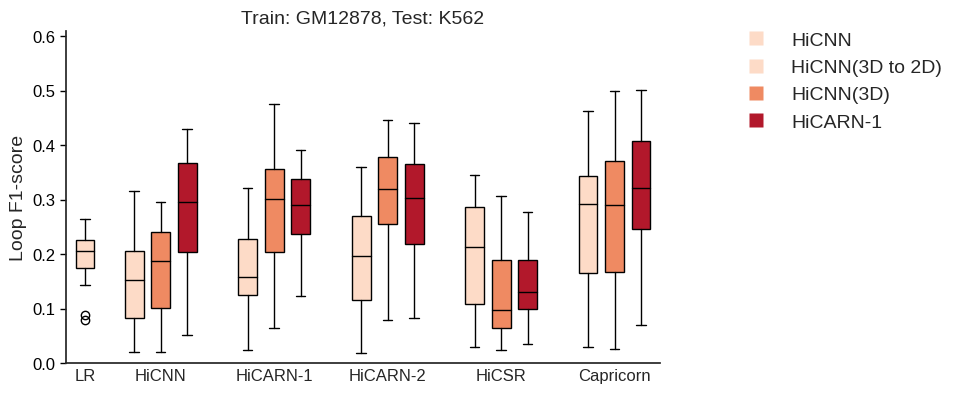

In [5]:
%matplotlib inline
# Ablation Study: 'Train: GM12878, Test: K562'; 
late_time_color = ["#fddbc7"] + ["#fddbc7", "#ef8a62", "#b2182b"] * 5
NUM=len(late_time_color)

ax = plot_settings.get_wider_axis(double=True)

ax.tick_params("y",which="major",length=4,width = 1.0,colors = "black")

#### FILL YOUR RESULTS BELOW ####
result_list = [[0.26365054602184085, 0.19806243272335844, 0.17748091603053434, 0.1426086956521739, 0.20134228187919462, 0.24341279799247176, 0.21772151898734177, 0.17303822937625754, 0.19783616692426584, 0.22087745839636913, 0.2332695984703633, 0.08780487804878048, 0.14864864864864866, 0.2118380062305296, 0.1787709497206704, 0.21120689655172414, 0.2109375, 0.23283582089552238, 0.254416961130742, 0.2275449101796407, 0.07865168539325842, 0.15037593984962405],
    [0.3157894736842105, 0.0975609756097561, 0.1167247386759582, 0.0433031218529708, 0.08902077151335312, 0.16040955631399317, 0.2091917591125198, 0.08118081180811808, 0.13960546282245828, 0.1971830985915493, 0.14539007092198583, 0.020512820512820513, 0.07398273736128237, 0.1989528795811518, 0.1943127962085308, 0.21923076923076923, 0.058365758754863814, 0.29069767441860467, 0.26720647773279355, 0.17475728155339806, 0.2532751091703057, 0.029024637192035095],
[0.2948717948717949, 0.15206611570247935, 0.10738255033557047, 0.09545454545454546, 0.1399548532731377, 0.19103313840155944, 0.24821002386634844, 0.08163265306122448, 0.19220779220779222, 0.20809248554913296, 0.15816326530612243, 0.0196078431372549, 0.0988593155893536, 0.24444444444444444, 0.22058823529411764, 0.275, 0.05952380952380952, 0.2747603833865815, 0.226890756302521, 0.18367346938775508, 0.2644628099173554, 0.025806451612903226],
[0.4295845997973658, 0.22900763358778622, 0.20553359683794467, 0.09502262443438914, 0.203125, 0.27364185110663986, 0.35629453681710216, 0.2080536912751678, 0.29023746701846964, 0.30038022813688214, 0.3010752688172043, 0.05217391304347826, 0.12121212121212122, 0.3806228373702423, 0.37762237762237766, 0.3436754176610978, 0.1702127659574468, 0.3701492537313433, 0.3709677419354839, 0.4, 0.34959349593495936, 0.058823529411764705],
[0.2768777614138439, 0.12314225053078556, 0.12928970470869913, 0.04597701149425287, 0.1257995735607676, 0.2265625, 0.16150740242261102, 0.13227513227513227, 0.12550066755674233, 0.22432432432432434, 0.1536144578313253, 0.02372644801116539, 0.08359456635318704, 0.2273781902552204, 0.2301255230125523, 0.22405271828665568, 0.07243460764587525, 0.32098765432098764, 0.30405405405405406, 0.2571428571428571, 0.22364217252396165, 0.12416851441241686],
[0.40384615384615385, 0.2748091603053435, 0.248565965583174, 0.09914529914529914, 0.23255813953488372, 0.29045643153526973, 0.3358024691358025, 0.19463087248322147, 0.26256983240223464, 0.3116370808678501, 0.316622691292876, 0.064, 0.11989100817438691, 0.3701067615658363, 0.38235294117647056, 0.3333333333333333, 0.1797752808988764, 0.3619631901840491, 0.3879310344827586, 0.32558139534883723, 0.47572815533980584, 0.06440677966101695],
[0.381957773512476, 0.2974683544303797, 0.25170068027210885, 0.14948453608247422, 0.2543640897755611, 0.23202614379084968, 0.3389830508474576, 0.2598187311178248, 0.2637889688249401, 0.2953271028037383, 0.2857142857142857, 0.12307692307692308, 0.19310344827586207, 0.33003300330033003, 0.33766233766233766, 0.3120567375886525, 0.18604651162790697, 0.34355828220858897, 0.3488372093023256, 0.3917525773195876, 0.33935018050541516, 0.12416851441241686],
[0.33418584825234443, 0.14731369150779897, 0.127134724857685, 0.04303967720242098, 0.11270983213429256, 0.24169184290030213, 0.20512820512820512, 0.13196480938416422, 0.15226939970717424, 0.23941605839416058, 0.18840579710144928, 0.018518518518518517, 0.05232558139534884, 0.2659279778393352, 0.28641975308641976, 0.27223230490018147, 0.09004739336492891, 0.36074270557029176, 0.3333333333333333, 0.30158730158730157, 0.2440677966101695, 0.030217186024551465],
[0.4448818897637795, 0.3020833333333333, 0.26666666666666666, 0.136986301369863, 0.2524271844660194, 0.31477927063339733, 0.35, 0.268370607028754, 0.30456852791878175, 0.32575757575757575, 0.3298429319371728, 0.08, 0.1694915254237288, 0.37542662116040953, 0.44, 0.3598130841121495, 0.18867924528301888, 0.3793103448275862, 0.4409448818897638, 0.41237113402061853, 0.44651162790697674, 0.08817635270541083],
[0.4158829676071055, 0.31144465290806755, 0.24045801526717558, 0.14351851851851852, 0.23218997361477572, 0.27104722792607805, 0.35799522673031026, 0.21453287197231835, 0.24376731301939059, 0.29435483870967744, 0.3646112600536193, 0.08298755186721991, 0.13745704467353953, 0.36101083032490977, 0.39568345323741005, 0.33906633906633904, 0.14965986394557823, 0.3653250773993808, 0.3829787234042553, 0.38202247191011235, 0.4411764705882353, 0.09389671361502347],
[0.3460837887067395, 0.162839248434238, 0.1581196581196581, 0.058922558922558925, 0.11048158640226628, 0.23448275862068965, 0.28776978417266186, 0.10819672131147541, 0.17235188509874327, 0.2581699346405229, 0.1902834008097166, 0.03209876543209877, 0.06934306569343066, 0.26625386996904027, 0.26436781609195403, 0.29321663019693656, 0.07536231884057971, 0.31137724550898205, 0.3409090909090909, 0.2830188679245283, 0.3215686274509804, 0.030005770340450086],
[0.19679430097951914, 0.07454068241469816, 0.061611374407582936, 0.029042904290429043, 0.09099901088031652, 0.10141987829614604, 0.10602759622367465, 0.06947890818858561, 0.09375, 0.1431159420289855, 0.0942622950819672, 0.030696576151121605, 0.04434589800443459, 0.20161290322580644, 0.19205298013245034, 0.19774718397997496, 0.04994054696789536, 0.30697674418604654, 0.19168173598553345, 0.11864406779661017, 0.17915904936014626, 0.02328042328042328],
[0.19279841224836972, 0.10571522960026429, 0.1183206106870229, 0.05035460992907802, 0.09943714821763602, 0.1510464058234759, 0.11140583554376658, 0.09980302035456336, 0.1534130893736805, 0.14970333181195802, 0.11184544992374174, 0.034934497816593885, 0.06809770540340489, 0.2584541062801932, 0.1962809917355372, 0.20414428242517269, 0.06968641114982578, 0.27755102040816326, 0.17670682730923695, 0.14385964912280702, 0.20373027259684362, 0.04079861111111111],
[0.46324786324786327, 0.20431328036322363, 0.18479532163742687, 0.07887817703768625, 0.1809369951534733, 0.32432432432432434, 0.3333333333333333, 0.15925925925925924, 0.2546816479400749, 0.28794992175273865, 0.296875, 0.029816513761467888, 0.10661764705882354, 0.3221884498480243, 0.31088082901554404, 0.34730538922155685, 0.11428571428571428, 0.42631578947368415, 0.38235294117647056, 0.38888888888888895, 0.4234234234234235, 0.03268945022288262],
[0.4872298624754421, 0.2131979695431472, 0.17900172117039587, 0.056249999999999994, 0.169811320754717, 0.28957528957528955, 0.3340961098398169, 0.16713091922005568, 0.25316455696202533, 0.29069767441860467, 0.2976501305483028, 0.02573529411764706, 0.1038961038961039, 0.28975265017667845, 0.39590443686006827, 0.3830734966592428, 0.12698412698412698, 0.4748603351955307, 0.33064516129032256, 0.48, 0.5, 0.031347962382445145],
[0.500475737392959, 0.283609576427256, 0.24806201550387597, 0.12090680100755667, 0.2626262626262626, 0.32233009708737864, 0.40358744394618834, 0.2077922077922078, 0.2945736434108527, 0.32122370936902483, 0.3316062176165803, 0.07086614173228346, 0.18623481781376516, 0.3754266211604096, 0.4444444444444444, 0.4292035398230089, 0.2448979591836735, 0.43258426966292135, 0.3868312757201647, 0.4086021505376344, 0.4752475247524753, 0.07760141093474426],
]
#### FILL YOUR RESULTS ABOVE ####
complete_name_list = ['HiCNN', 'HiCNN(3D to 2D)', 'HiCNN(3D)', 'HiCARN-1', 'HiCARN-1(3D to 2D)', 'HiCARN-1(3D)', 'HiCARN-2', 
                      'HiCARN-2(3D to 2D)', 'HiCARN-2(3D)',
                      'HiCSR', 'HiCSR(3D to 2D)',  'HiCSR(3D)', 'Capricorn (2D)', 'Capricorn (3D to 2D)', 'Capricorn (3D)']
xticklabels = ['' for i in range(NUM)]
xticklabels[0] = 'LR'
xticklabels[2] = 'HiCNN'
xticklabels[5] = 'HiCARN-1'
xticklabels[8] = 'HiCARN-2'
xticklabels[11] = 'HiCSR'
xticklabels[14] = 'Capricorn'
positions = [0, 1.3, 2, 2.7, 4.3, 5, 5.7, 7.3, 8, 8.7, 10.3, 11, 11.7, 13.3, 14, 14.7]
plot_utils.box_plot(ax, result_list, widths=0.5, 
    ylabel='Loop F1-score', box_colors=late_time_color, xticks=np.arange(0, NUM, 1), xticklabels=xticklabels, xlabel='', positions=positions)
complete_col_list = late_time_color
lp = lambda i: plt.plot([],color=complete_col_list[i], ms=10, mec="none",
                        label=complete_name_list[i], ls="",  marker="s")[0]
handles = [lp(i) for i in range(NUM // 4)]
type_name_list = ["Primary channel only", "5-channel input only", "Full 5-channel model"]
plot_utils.format_legend(ax, handles, type_name_list[:3])
plt.ylim(0.0, 0.61)
plot_utils.put_legend_outside_plot(ax)
plot_utils.format_ax(ax)
plt.tight_layout()
plt.title('Train: GM12878, Test: K562')

plt.savefig(fig_dir + 'TestK562_ablation_with_lr.pdf')

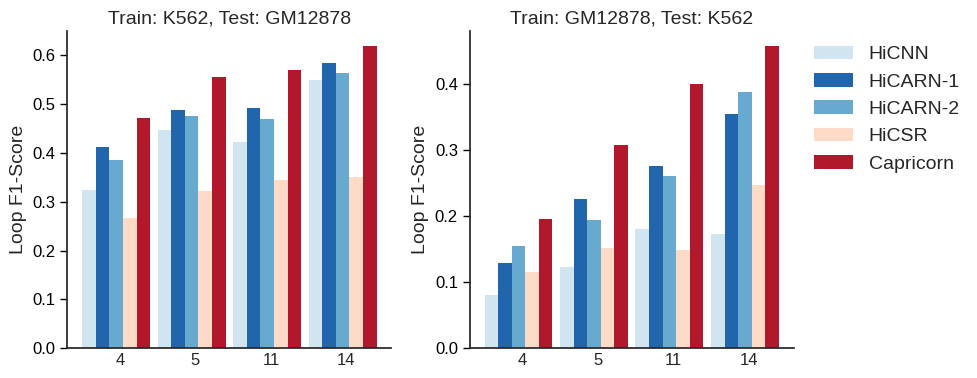

In [11]:
%matplotlib inline
#Cross-chromosome experiments
ax = plot_settings.get_wider_axis(double=True)
ax = plt.subplot(1, 2, 1)
model_ordering = plot_settings.get_model_ordering([mod for mod in plot_settings.EVO_DEVO_MODELS if mod != 'prescient'])
nested_color = ["#d1e5f0", "#2166ac", "#67a9cf", "#fddbc7", "#b2182b"]
labels = [plot_settings.get_model_name_conventions(mod) for mod in model_ordering]

#GM12878
#### FILL YOUR RESULTS BELOW ####
hicnn=[0.3232077764277035, 0.44765342960288806, 0.4224872231686541, 0.5492957746478874]#HiCNN
hicarn1 = [0.41324200913242004, 0.4885764499121265, 0.49180327868852464, 0.5844748858447488]#HiCARN-1
hicarn2 = [0.3854625550660793, 0.47521367521367525, 0.4693877551020409, 0.5631929046563193]#HiCARN-2
hicsr = [0.2660098522167488, 0.3220675944333996, 0.34418604651162793, 0.35114503816793896]#HiCSR
capricorn = [0.471143, 0.555556, 0.570825, 0.618510]#Capricorn
#### FILL YOUR RESULTS ABOVE ####
mean_list = [hicnn, hicarn1, hicarn2, hicsr, capricorn]
means = [[mean_list[j][i] for j in range(5) ] for i in range(4)]
labels = ['HiCNN', 'HiCARN-1', 'HiCARN-2', 'HiCSR', 'Capricorn']
metric_name = ['4', '5', '11', '14']

plot_utils.grouped_barplot(
    ax, means, metric_name,
    xlabel='', ylabel='Loop F1-Score', 
    nested_color=nested_color, tickloc_top=False, rotangle=0, anchorpoint='center',
    min_val=0.0, ecolor='black')

plot_utils.format_ax(ax)
ax.tick_params("y",which="major",
                length=5,width = 1,
                colors = "black")
plt.title('Train: K562, Test: GM12878')

ax = plt.subplot(1, 2, 2)
model_ordering = plot_settings.get_model_ordering([mod for mod in plot_settings.EVO_DEVO_MODELS if mod != 'prescient'])
labels = [plot_settings.get_model_name_conventions(mod) for mod in model_ordering]
#K562
#### FILL YOUR RESULTS BELOW ####
hicnn=[0.08, 0.12280701754385966, 0.1803713527851459, 0.17254901960784313]#HiCNN
hicarn1 = [0.12953367875647667, 0.22594142259414227, 0.2765432098765432, 0.3552123552123552]#HiCARN-1
hicarn2 = [0.15422885572139303, 0.19379844961240308, 0.26143790849673204, 0.3882783882783883]#HiCARN-2
hicsr = [0.11538461538461536, 0.1516245487364621, 0.1486725663716814, 0.24749163879598662]#HiCSR
capricorn = [0.195286, 0.308458, 0.4, 0.457364]#Capricorn
#### FILL YOUR RESULTS ABOVE ####
mean_list = [hicnn, hicarn1, hicarn2, hicsr, capricorn]
means = [[mean_list[j][i] for j in range(5) ] for i in range(4)]
labels = ['HiCNN', 'HiCARN-1', 'HiCARN-2', 'HiCSR', 'Capricorn']
metric_name = ['4', '5', '11', '14']

plot_utils.grouped_barplot(
    ax, means, metric_name,
    xlabel='', ylabel='Loop F1-Score', color_legend=labels,
    nested_color=nested_color, tickloc_top=False, rotangle=0, anchorpoint='center',
    legend_loc='upper left', min_val=0.0, ecolor='black')
plot_utils.format_ax(ax)
plot_utils.format_legend(ax, *ax.get_legend_handles_labels(), loc='upper right', 
                        ncols=2)
plot_utils.put_legend_outside_plot(ax, anchorage=(1.01, 1.01))
ax.tick_params("y",which="major",
                length=5,width = 1,
                colors = "black")

plt.title('Train: GM12878, Test: K562')
plt.tight_layout()
plt.savefig(fig_dir + 'cross_chromosome.pdf')

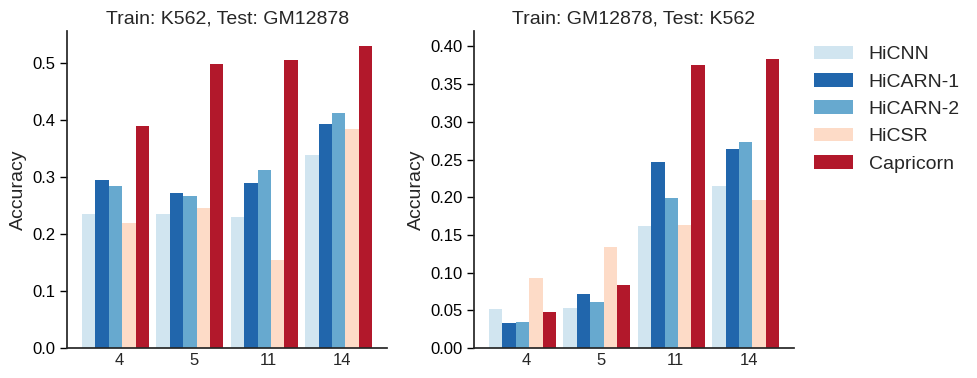

In [12]:
%matplotlib inline
#Cross-chromosome+Cross Cell-line experiments
ax = plot_settings.get_wider_axis(double=True)
ax = plt.subplot(1, 2, 1)
model_ordering = plot_settings.get_model_ordering([mod for mod in plot_settings.EVO_DEVO_MODELS if mod != 'prescient'])
nested_color = ["#d1e5f0", "#2166ac", "#67a9cf", "#fddbc7", "#b2182b"]
labels = [plot_settings.get_model_name_conventions(mod) for mod in model_ordering]

#Train: K562, Test: GM12878
#### FILL YOUR RESULTS BELOW ####
hicnn=[0.2356091030789826, 0.23595505617977527, 0.22946859903381642, 0.3389312977099237]#HiCNN
hicarn1 = [0.2948073701842546, 0.27253668763102723, 0.2886956521739131, 0.39303482587064675]#HiCARN-1
hicarn2 =[0.28438948995363217, 0.26717557251908397, 0.3126050420168067, 0.4119106699751861]#HiCARN-2
hicsr = [0.21985815602836878, 0.24646464646464644, 0.15455594002306805, 0.38443935926773454]#HiCSR
capricorn = [0.389831, 0.498282, 0.505976, 0.529038]#Capricorn
#### FILL YOUR RESULTS ABOVE ####

mean_list = [hicnn, hicarn1, hicarn2, hicsr, capricorn]
means = [[mean_list[j][i] for j in range(5) ] for i in range(4)]
labels = ['HiCNN', 'HiCARN-1', 'HiCARN-2', 'HiCSR', 'Capricorn']
metric_name = ['4', '5', '11', '14']

plot_utils.grouped_barplot(
    ax, means, metric_name,
    xlabel='', ylabel='Accuracy', 
    nested_color=nested_color, tickloc_top=False, rotangle=0, anchorpoint='center',
    min_val=0.0, ecolor='black')
plot_utils.format_ax(ax)

ax.tick_params("y",which="major",
                length=5,width = 1,
                colors = "black")
plt.title('Train: K562, Test: GM12878')

ax = plt.subplot(1, 2, 2)
model_ordering = plot_settings.get_model_ordering([mod for mod in plot_settings.EVO_DEVO_MODELS if mod != 'prescient'])
labels = [plot_settings.get_model_name_conventions(mod) for mod in model_ordering]
#Train: GM12878, Test: K562
#### FILL YOUR RESULTS BELOW ####
hicnn=[0.05196733481811432, 0.05378151260504202, 0.1620253164556962, 0.21487603305785122]#HiCNN
hicarn1 = [0.03382433169667212, 0.07169344870210136, 0.24644549763033177, 0.2641509433962264]#HiCARN-1
hicarn2 = [0.03488843813387424, 0.06065857885615252, 0.1991341991341991, 0.2736156351791531]#HiCARN-2
hicsr = [0.09315068493150684, 0.1339712918660287, 0.16356877323420074, 0.1964285714285714]#HiCSR
capricorn = [0.048465, 0.084367, 0.375, 0.383333]#Capricorn
#### FILL YOUR RESULTS ABOVE ####

mean_list = [hicnn, hicarn1, hicarn2, hicsr, capricorn]
means = [[mean_list[j][i] for j in range(5) ] for i in range(4)]
labels = ['HiCNN', 'HiCARN-1', 'HiCARN-2', 'HiCSR', 'Capricorn']
metric_name = ['4', '5', '11', '14']


plot_utils.grouped_barplot(
    ax, means, metric_name,
    xlabel='', ylabel='Accuracy', color_legend=labels,
    nested_color=nested_color, tickloc_top=False, rotangle=0, anchorpoint='center',
    legend_loc='upper left', min_val=0.0, ecolor='black')
plot_utils.format_ax(ax)
plot_utils.format_legend(ax, *ax.get_legend_handles_labels(), loc='upper right', 
                        ncols=2)
plot_utils.put_legend_outside_plot(ax, anchorage=(1.01, 1.01))
ax.tick_params("y",which="major",
                length=5,width = 1,
                colors = "black")

plt.title('Train: GM12878, Test: K562')
plt.tight_layout()
plt.ylim(0.0, 0.42)
plt.savefig(fig_dir + 'cross_chromosome_celltype.pdf')